# Unsupervised Clustering using K-Means


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a dataset

In [2]:
features, labels = make_blobs(n_samples=200, centers=3, cluster_std=5)

In [3]:
features.shape

(200, 2)

In [4]:
features.T.shape

(2, 200)

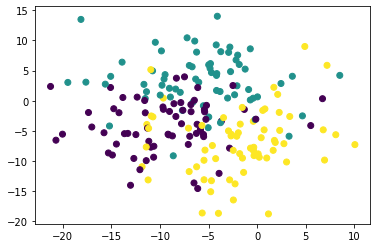

In [5]:
plt.scatter(features.T[0,:],features.T[1,:],c=labels)

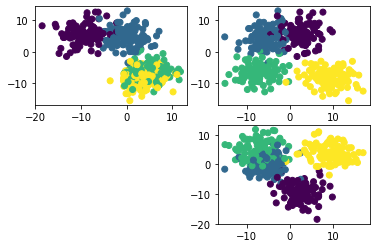

In [6]:
features, labels = make_blobs(n_samples=400, n_features=3, centers=4, cluster_std=3,random_state=10)
plt.subplot(2,2,1)
plt.scatter(features.T[1,:],features.T[0,:],c=labels)
plt.subplot(2,2,2)
plt.scatter(features.T[2,:],features.T[0,:],c=labels)
plt.subplot(2,2,4)
plt.scatter(features.T[2,:],features.T[1,:],c=labels)

# Normalize Data

In [7]:
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
#alternatively you can just use fit transform
#scaled_features = scaler.fit_transform(features)

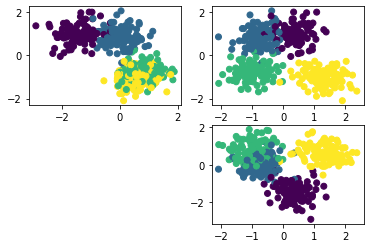

In [8]:

plt.subplot(2,2,1)
plt.scatter(scaled_features.T[1,:],scaled_features.T[0,:],c=labels)
plt.subplot(2,2,2)
plt.scatter(scaled_features.T[2,:],scaled_features.T[0,:],c=labels)
plt.subplot(2,2,4)
plt.scatter(scaled_features.T[2,:],scaled_features.T[1,:],c=labels)

# K-Means

In [9]:
# Number of clusters
kmeans = KMeans(n_clusters=4,init='random')
# Fitting the input data
kmeans = kmeans.fit(scaled_features)
# Getting the cluster labels
clusters_assigned = kmeans.predict(scaled_features)
# Centroid values
centroids = kmeans.cluster_centers_

In [10]:
kmeans

KMeans(init='random', n_clusters=4)

In [11]:
kmeans.n_iter_

8

In [12]:
centroids

array([[ 0.98188788, -1.46903386,  0.39295981],
       [-1.03243969,  0.62115143,  1.32589246],
       [-0.80704188,  0.82783906, -0.95665748],
       [ 0.84028253,  0.0113378 , -0.73039831]])

In [13]:
kmeans.n_iter_

8

In [14]:
kmeans.inertia_

206.22236896296414

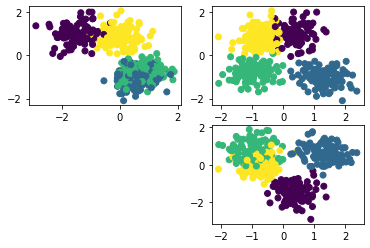

In [15]:
plt.subplot(2,2,1)
plt.scatter(scaled_features.T[1,:],scaled_features.T[0,:],c=clusters_assigned)
plt.subplot(2,2,2)
plt.scatter(scaled_features.T[2,:],scaled_features.T[0,:],c=clusters_assigned)
plt.subplot(2,2,4)
plt.scatter(scaled_features.T[2,:],scaled_features.T[1,:],c=clusters_assigned)

# Select the best K (Number of clusters)


## Elbow Method

How Sum of Squared Error changes as K changes in Kmeans

In [16]:
sse = []
for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, init= "random")
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

In [17]:
sse

[643.0899991780233,
 354.5024630019132,
 206.22236896296414,
 189.9585367092462,
 173.87403152694003,
 158.65894609463618,
 150.8140465395427,
 144.69987656735339,
 130.53615569969202,
 125.07665715695455,
 118.90002221798355,
 112.42532756948914,
 106.87668930737127,
 104.0856232691701,
 98.38054345809726,
 96.56780260995455,
 91.00502036971022,
 87.80164925475671]

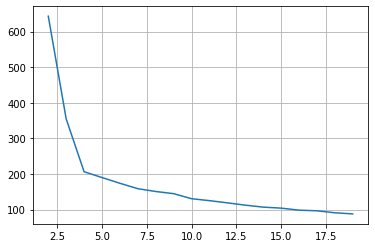

In [18]:
plt.plot([i for i in range(2,20)],sse)
plt.grid()

## Silhouette coefficient

In [19]:
from sklearn.metrics import silhouette_score

sse = []
slc=[]
for k in range(2, 30):
  kmeans = KMeans(n_clusters=k, init= "random")
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)
  slc.append(silhouette_score(scaled_features, kmeans.labels_))

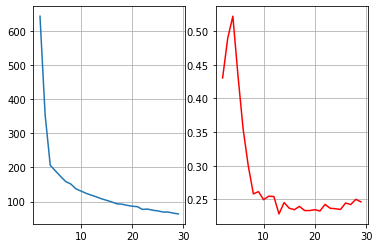

In [20]:
plt.subplot(1,2,1)
plt.plot([i for i in range(2,30)],sse)
plt.grid()
plt.subplot(1,2,2)
plt.plot([i for i in range(2,30)],slc,color='red')
plt.grid()